<a href="https://colab.research.google.com/github/jimsjoo/finance/blob/master/ALOGO_ThreeMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Three moving averages crossover to determine when to buy and sell stock

In [15]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
ticker = 'TSLA'
df = web.DataReader(ticker, data_source='yahoo',start='2019-11-18', end='2020-06-09')

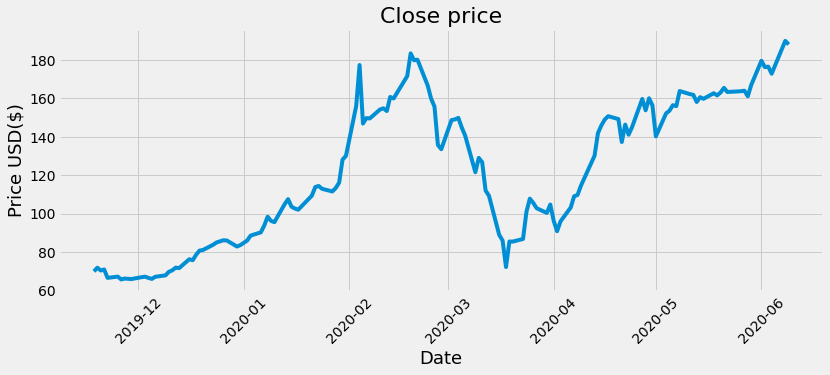

In [16]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close price', fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD($)', fontsize=18)
plt.show()

In [17]:
shortEMA = df['Close'].ewm(span=5, adjust=False).mean()
longEMA = df['Close'].ewm(span=63, adjust=False).mean()
middleEMA = df['Close'].ewm(span=21, adjust=False).mean()

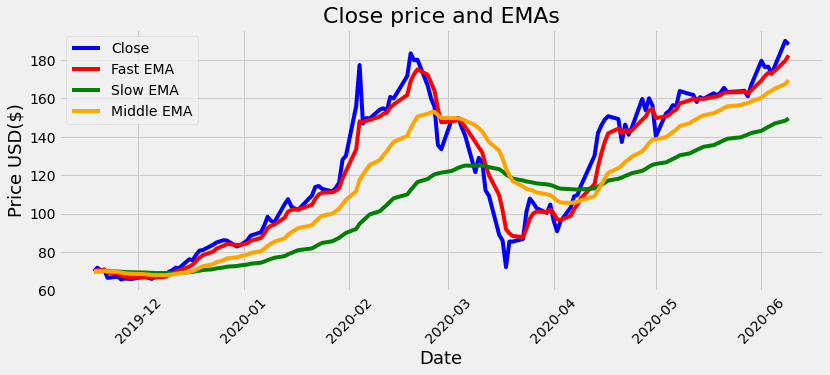

In [18]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(shortEMA, label='Fast EMA', color='red')
plt.plot(longEMA, label='Slow EMA', color='green')
plt.plot(middleEMA, label='Middle EMA', color='orange')
plt.xticks(rotation=45)
plt.title('Close price and EMAs', fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [19]:
df['short'] = shortEMA
df['long'] = longEMA
df['middle'] = middleEMA

In [20]:
def get_signal(data):
  buy_signal = []
  sell_signal = []
  flag_long = False
  flag_short = False
  for i in range(0, len(data)):
    if data['middle'][i] < data['long'][i] and data['short'][i] < data['middle'][i] and flag_long==False and flag_short==False:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
      flag_short = True
    elif flag_short==True and data['short'][i] > data['middle'][i]:     
      sell_signal.append(data['Close'][i])
      buy_signal.append(np.nan)
      flag_short = False
    elif data['middle'][i] > data['long'][i] and data['short'][i] > data['middle'][i] and flag_long==False and flag_short==False:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
      flag_long = True
    elif flag_long==True and data['short'][i] < data['middle'][i]:     
      sell_signal.append(data['Close'][i])
      buy_signal.append(np.nan)
      flag_long = False  
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)  
  return (buy_signal,sell_signal)   

In [21]:
df['Buy'] = get_signal(df)[0]
df['Sell'] = get_signal(df)[1]

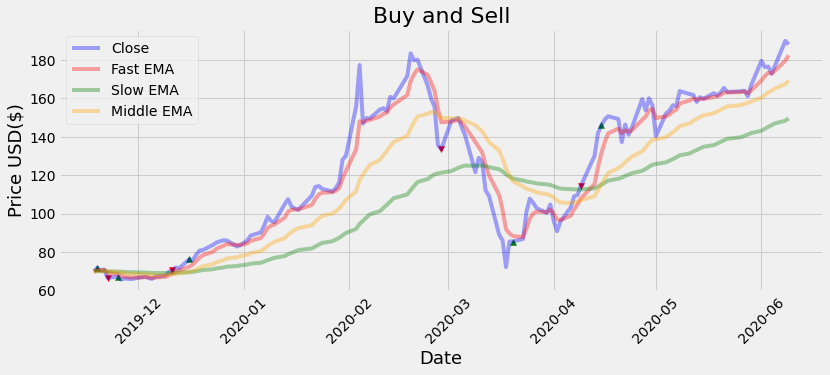

In [22]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close', color='blue', alpha=0.35)
plt.plot(shortEMA, label='Fast EMA', color='red', alpha=0.35)
plt.plot(longEMA, label='Slow EMA', color='green', alpha=0.35)
plt.plot(middleEMA, label='Middle EMA', color='orange', alpha=0.35)
plt.scatter(df.index, df['Buy'], color='green', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha=1)
plt.xticks(rotation=45)
plt.title('Buy and Sell', fontsize=22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()